In [14]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [15]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


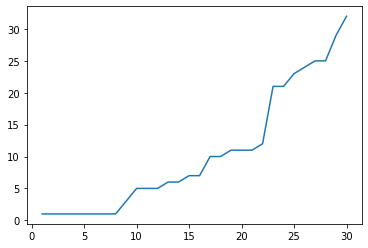

In [19]:
df = df[df['city']=='Ivinhema']
plt.plot(df.day,df.cases)
# plt.plot(df.day,df.deaths)

In [17]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
93394,2020-06-19,MS,Ivinhema,city,24,0,26,False,23187,5004700,...,0.0,1.035,0.0,0.043,0.0,1,0,0.0,0.080,0.0
93395,2020-06-20,MS,Ivinhema,city,25,0,27,False,23187,5004700,...,0.0,1.078,0.0,0.043,0.0,2,0,0.0,0.086,0.0
93396,2020-06-21,MS,Ivinhema,city,25,0,28,False,23187,5004700,...,0.0,1.078,0.0,0.000,0.0,2,0,0.0,0.086,0.0
93397,2020-06-22,MS,Ivinhema,city,29,0,29,False,23187,5004700,...,0.0,1.251,0.0,0.173,0.0,2,0,0.0,0.105,0.0
93398,2020-06-23,MS,Ivinhema,city,32,0,30,True,23187,5004700,...,0.0,1.380,0.0,0.129,0.0,1,0,0.0,0.068,0.0
